In [2]:
Vmax = 3.25e-9 #ugP/um2/hour
Vmax = Vmax*1e6 #ugP.mm-2.hour-1
DP = 1e-5#cm**2-s-1, diffusion coefficient of small ions in water
DP = DP*1e2*3600 #mm**2-h-1, diffusion coefficient of small ions in water
C0 = 3.5 #ug/mL=ug/cm**-3
C0 = 3.5*1e-3 #ug/mm**-3

DP,Vmax,C0

(3.6, 0.0032500000000000003, 0.0035)

In [7]:
import numpy as np
Mc = 1 #kg.L-1
Mc = 
Mc *= 0.5*0.21*1.1 #
Mc *= 1e6 
Mc *= 2 #ug.mm-3
C0=0.0014 #ug.mm-3
Price = 3

In [8]:
Price*C0/(np.pi*Mc*3**2)

6.43050275118769e-07

In [5]:
# C0 = 0.003  #ug.mm3
# psat = 2 #mm/mm3
# Ccost = psat*np.pi*(sim.r0)**2 #mm**3.mm-3
# # Ccost *= (sim.v_sval/0.25)**(sim.speed_penalty)

# Ccost *= 0.5*0.21*1.1 *1e-3 #g.mm-3
# Ccost *= 1e6 #ug.mm-3
# Ccost *= 2 #ug.mm-3

In [6]:
C0 = 500 #mg.L-1
C0 = 500*1e3 #ug.L-1
C0 = C0 * 1e-3 #ug.cm-3
C0 = C0 *1e-3 #ug.mm-3
C0

0.5

In [7]:
Km = 1e-3 #umol/cm3
Km *= 31 #ug/cm3
Km *=1e-3 #ug/mm3
Km_snchepf = Km 
Km_snchepf

3.1e-05

In [8]:
Km = 5.8e-3 #umol/cm3
Km *= 31 #ug/cm3
Km *=1e-3 #ug/mm3
Km*1000

0.1798

In [9]:
bp = 8.8 #mm
f_v = 1/bp #mm-1

In [10]:
def signed_sqrt(x,alpha = 1/2):
    """Return the signed square root of a number."""
    if x >= 0:
        return x**alpha
    else:
        return -(-x)**alpha

In [11]:
import sys
sys.path.append('/home/cocopyth/miniconda3/lib/python3.9/site-packages')
print(sys.path)


['/home/cocopyth/PandC', '/home/cocopyth/miniconda3/envs/bvpy_manu/lib/python39.zip', '/home/cocopyth/miniconda3/envs/bvpy_manu/lib/python3.9', '/home/cocopyth/miniconda3/envs/bvpy_manu/lib/python3.9/lib-dynload', '', '/home/cocopyth/.local/lib/python3.9/site-packages', '/home/cocopyth/miniconda3/envs/bvpy_manu/lib/python3.9/site-packages', '/home/cocopyth/miniconda3/envs/bvpy_manu/lib/python3.9/site-packages/setuptools/_vendor', '/home/cocopyth/miniconda3/lib/python3.9/site-packages']


In [11]:
!pip install tqdm

In [12]:
# !pip install tqdm
from tqdm.notebook import tqdm  # Import tqdm
import matplotlib.pyplot as plt
path_figure = r"/mnt/c/Users/coren/Documents/PhD/paper/PandC/Fig5"
plt.style.use('presentation.mplstyle')


/tmp/ipykernel_10297/2820506058.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap3 = mpl.cm.get_cmap("autumn")
/tmp/ipykernel_10297/2820506058.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap4 = mpl.cm.get_cmap("summer")
/tmp/ipykernel_10297/2820506058.py:177: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("winter")
/tmp/ipykernel_10297/2820506058.py:178: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7

Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

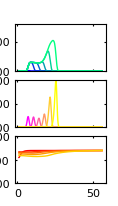

In [23]:
cm = 1/2.54  # centimeters in inches
%matplotlib widget
from dolfin import *
import numpy as np
import matplotlib as mpl
import os
import matplotlib.ticker as ticker
Length = 140*0.4
nx = int(350*15//10*0.4/0.8)
plt.close("all")
set_log_active(False)
cmap3 = mpl.cm.get_cmap("autumn")
cmap4 = mpl.cm.get_cmap("summer")

class Simulation:
    """
    A class for simulating a finite element problem using the FEniCS framework.

    Attributes:
    -----------
    Length: float
        Length of the interval domain.
    nx: int
        Number of subdivisions in the mesh.
    nT: int
        Number of time steps.
    T: float
        Total simulation time.
    C0: float
        Initial concentration value.
    Fmax: float
        Maximum flux value.
    Pprice_ideal: float
        Ideal price value.
    width: float
        Width of the plot.
    height: float
        Height of the plot.
    """
    def __init__(self, Length=Length, nx=nx, nT=200, T=400, C0=10, Fmax=2, Pprice_ideal=20, width=3*cm, height=7*cm,speed = 0.230,adaptation_rate = 1e-4,drag = 0):
        self.Length = Length
        self.nx = nx
        self.dx = Length/nx
        self.nT = nT
        self.T = T
        self.dt = T/nT
        self.C0 = C0 #ug.mm-3
        self.Fmax = Fmax
        self.Pprice_ideal = Pprice_ideal
        self.width = width
        self.height = height
        self.speed = speed
        self.adaptation_rate = adaptation_rate
        self.speed_penalty = drag
        self._setup_simulation()
        self.r0 = 3e-3

    def _setup_simulation(self):
        # Set up the simulation: define mesh, function spaces, initial conditions, etc.
        """
        Sets up the initial conditions and parameters for the simulation.
        """
        # Create mesh and define function space
        self.mesh = IntervalMesh(self.nx, 1, self.Length)
        P1 = FiniteElement('P', interval, 1)
        element = MixedElement([P1, P1, P1])
        self.V = FunctionSpace(self.mesh, element)

        # Define initial conditions
        u0 = Expression(('0.9*exp(-1.2*pow(abs(x[0]-7),2))', 
                         f'(1-exp(-3*(x[0]-1)))*{self.C0}', '0*exp(-0.01*pow(abs(x[0]),2))'), degree=1)
        rexp = Expression(('1/x[0]', '0', '0'), degree=1)
        self.r = interpolate(rexp, self.V)
        self.invr, _, _ = split(self.r)
        self.u_n = interpolate(u0, self.V)

        # Splitting functions for later use
        self.u = Function(self.V)
        self.n, self.C, self.rho = split(self.u)   #mm-3,ug.mm-3,mm2.mm-3
        self.n_n, self.C_n, self.rho_n = split(self.u_n)
        self.v_1, self.v_0, self.v_2 = TestFunctions(self.V)

        # Set parameters and constants
        self.dt = self.T / self.nT
        self.alphval = 0.039 #.h-1
        self.alphval0 = self.alphval
        self.betaval = 0.022 #mm.h-1 length coefficient
        # self.betaval = 0.022/(2.5e-3) #mm.h-1 SA coefficient
        
        self.beta = Constant(self.betaval) #mm**4.h-1
        self.D = 0.0008 #mm**2.h-1
        self.D0 = self.D #mm**2.h-1
        
        self.D2 = Constant(3.6) #mm**2.h-1
        self.n_mid = 0.5*(self.n_n + self.n)
        self.v_sval = self.speed #mm.h-1
        self.s_scal = self.speed #mm.h-1
        self.v_s = Constant((self.v_sval,)) #mm.h-1
        self.Vmax = self.Fmax #ug.mm**-2.h-1
        self.Kp = Km_snchepf #ug.mm-3
        # Boundary conditions
        u_L = (Constant(0.0), Constant(0.0), Constant(0.0))
        u_R = (Constant(0.0), Constant(self.C0), Constant(0.0))
        bc_L0 = DirichletBC(self.V.sub(0), Constant(0.0), 'near(x[0], 1.0)')
        bc_L2 = DirichletBC(self.V.sub(2), Constant(0.0), 'near(x[0], 1.0)')
        # bc_L = DirichletBC(self.V, u_L, 'near(x[0], 1.0)')
        bc_R = DirichletBC(self.V, u_R, f'near(x[0], {self.Length})')
        self.bcs = [bc_L0,bc_L2, bc_R]

    def _make_F(self, alphval,D,sval):
        # Define the variational problem F
        alpha = Constant(alphval)
        D = Constant(D)
        s_scal = Constant(sval)
        C_L =  self.C/bp
        
        # dn/dt
        F = self.n*self.v_1*dx - self.n_n*self.v_1*dx 
        # D lapplacian(n)
        F += D*dot(grad(self.n), grad(self.v_1))*self.dt*dx
        # To account for cylindrical coordinates
        F += self.invr*D*dot(grad(self.n), Constant((1,)))*self.v_1*self.dt*dx
        
        #v.grad(n)
        F += self.dt*dot(grad(self.n_mid),self.v_s)*self.v_1*dx
        # To account for cylindrical coordinates
        F += self.invr*self.dt*self.n_mid*Constant(self.v_sval)*self.v_1*dx
        
        #alpha*n - beta * n * rho
        F += self.beta*self.v_1*self.rho*(self.n)*self.dt*dx
        F -= alpha*(self.n)*self.v_1*self.dt*dx
        #d rho/dt = vn
        F -= self.dt*s_scal*self.n*self.v_2*dx-(self.rho-self.rho_n)*self.v_2*dx


        # dC/dt
        F += self.C*self.v_0*dx - self.C_n*self.v_0*dx #ug.mm-3
        # Vmax * rho * C/(C+Kp)
        #Expression without any radius change
        F += 2*np.pi*self.Vmax*(self.rho)*self.r0*(self.C/bp/(self.Kp+self.C/bp))*self.v_0*self.dt*dx #ug
        #Expression with radius change
        # F += (self.v_sval/0.25)**(self.speed_penalty)*2*np.pi*self.Vmax*(self.rho)*self.r0*(self.C/bp/(self.Kp+self.C/bp))*self.v_0*self.dt*dx #ug
        # Diffusion 
        F += self.D2*dot(grad(self.C), grad(self.v_0))*self.dt*dx
        # To account for cylindrical coordinates
        F += self.invr*self.D2*dot(grad(self.C/bp), Constant((1,)))*self.v_0*self.dt*dx
        return F
    
    def integrate(self, plot=False,remove_ylabels = False):
        """
        Integrate the problem over time and optionally plot the results.
        Returns arrays of C(x, t), rho(x, t), and n(x, t) over the simulation.

        Parameters:
        -----------
        plot: bool
            If True, plot the results using matplotlib.

        Returns:
        --------
        C_xt: list of arrays
            Concentration C as a function of position x and time t.
        rho_xt: list of arrays
            Density rho as a function of position x and time t.
        n_xt: list of arrays
            Quantity n as a function of position x and time t.
        """
        # Initialize arrays to store C(x, t), rho(x, t), and n(x, t)
        C_xt = []
        rho_xt = []
        n_xt = []
        P_prices = []
        alphavals = []
        # Initialize matplotlib plots if needed
        if plot:
            fig, axs = plt.subplots(3, 1, figsize=(self.width, self.height*0.75))
            cmap = mpl.cm.get_cmap("winter")
            cmap2 = mpl.cm.get_cmap("spring")

        # Time-stepping loop
        V2 = FunctionSpace(self.mesh, 'P', 1)
        X = np.linspace(1, self.Length, self.nx)
        i=0
        tot_CCosts= [] 
        tot_Pacqus = []
        for t in tqdm(np.linspace(0, self.T, self.nT), desc="Simulating"):
            F = self._make_F(self.alphval,self.D,self.s_scal)
            solve(F == 0, self.u, self.bcs)
            self.u_n.assign(self.u)
            _n, _C, _rho = self.u.split()

            # Interpolate and store the results
            n_field = interpolate(_n, V2)
            rho_field = interpolate(_rho, V2)
            C_field = interpolate(_C, V2)
            Ccost = np.pi*np.sum([n_field(x)*x*self.dx*self.v_sval for x in X]) #mm.h-1
            Ccost *= np.pi*(self.r0)**2 #mm**3.h-1
            Ccost *= 1e-3  #mL.mm-1.h-1=dm**3.h-1
            
            Ccost *= 0.5*0.21*1.1 #g.h-1
            Ccost *= 1e6 #ug.h-1
            Ccost *= 2 #respiration
            
            Ccost *= (self.v_sval/0.25)**(self.speed_penalty)
            Pacquisition = np.pi*np.sum([self.Vmax*(C_field(x)/bp/(C_field(x)/bp+self.Kp))*rho_field(x)*x*self.dx for x in X]) #ug.h-1.mm-2
            Pacquisition *= 2*self.r0*np.pi #ug.mm-1
            # Pacquisition += 5e-4*np.exp(-t/100)
            tot_CCosts.append(Ccost) 
            tot_Pacqus.append(Pacquisition)
            # Pprice = Ccost/Pacquisition
            integrated_CCost = np.sum(tot_CCosts[-10*self.T//self.nT:])
            integrated_Pacqu = np.sum(tot_Pacqus[-10*self.T//self.nT:])
            
            Pprice = integrated_CCost/integrated_Pacqu

            alphavals.append(self.alphval)
            if t>=0:
                # self.s_scal = self.Pprice_ideal/Pprice*self.speed
                self.alphval = max(0.001,self.alphval + self.dt*self.adaptation_rate*(t/50)**2*signed_sqrt((self.Pprice_ideal-Pprice)/self.Pprice_ideal,alpha = 1))
            # print(self.alphval)
            self.D = self.D0*self.alphval0/self.alphval
            # print(2*(np.sqrt(self.D*self.alphval)))
            n_xt.append([n_field(x) for x in X])
            rho_xt.append([rho_field(x) for x in X])
            C_xt.append([C_field(x) for x in X])
            P_prices.append(Pprice)
            # print(Pprice,self.alphval)
            if plot and i % (self.nT//5) == 0:
                axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
                axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
                axs[2].plot(X, np.array(C_xt[-1])*1000/bp, color=cmap3(t / self.T))
                # Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/bp/(C_xt[-1][i]/bp+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]

                # axs[3].plot(X, Pacq, color=cmap4(t / self.T))
                # break
            i+=1
            

        # Finalize plot settings if plotting
        if plot:
            axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
            axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
            satrho = np.median([rho for rho in rho_xt[-1] if rho>1e-10])
            
            # axs[0].hlines(satrho,np.min(X),np.max(X), color="red")
            
            # axs[2].plot(X, np.array(C_xt[-1])*1000/bp, color=cmap3(t / self.T))
            Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/bp/(C_xt[-1][i]/bp+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]
            # axs[3].plot(X, Pacq, color=cmap4(t / self.T))
            axs[0].set_ylabel(r'$\rho$'+ '\n $(mm^{-1})$')
            axs[0].set_xticklabels([])
            axs[0].set_ylim(0,8)
            
            axs[1].set_ylabel('$n$ \n $(mm^{-2})$')
            axs[1].set_xticklabels([])
            axs[1].set_ylim(0,4)
            
#             axs[2].set_ylabel('$[P]$ \n ($ng/ mm^{3}$)')
#             axs[2].set_xticklabels([])
            axs[2].set_ylim(0,2)
            
#             axs[3].set_ylabel('$\phi_P$ \n ($ng/mm^{3}/h$)')

            axs[1].set_xlabel('position \n ($mm$)')
#             axs[3].set_ylim(0,0.30)

            formatter = ticker.FormatStrFormatter('%.2f')  # Adjust format as needed

            for ax in axs:
                ax.yaxis.set_major_formatter(formatter)
            if remove_ylabels:
                for ax in axs:
                    ax.set_ylabel('')
                    ax.set_yticklabels([])

            plt.show()

        return C_xt, rho_xt, n_xt,P_prices,alphavals
        

# Example usage:
adaptation_rate = 8e-3
C0=0.0014*bp #ug/mm2
Pprice_ideal = 3
speed = 0.17 #mm/h
T = 100
nT= 200
sim = Simulation(speed = speed,C0=C0,T = T,nT=nT,Pprice_ideal = Pprice_ideal,Fmax = Vmax,adaptation_rate = adaptation_rate,drag = 1)
C_xt, rho_xt, n_xt,P_prices,alphavals = sim.integrate(plot=True)


In [ ]:
2*np.sqrt(sim.D*sim.alphval)

In [ ]:
plt.savefig(os.path.join(path_figure,f'FigureAnew.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
C_xt, rho_xt, n_xt = np.array(C_xt),np.array(rho_xt),np.array(n_xt)
X = np.linspace(1, sim.Length, sim.nx)
Pacquisitions = np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1)*np.pi/2 #ug.h-1.mm-2

Pacquisitions *= 2*sim.r0*np.pi #ug.h-1
Ccost = np.sum(n_xt*X*sim.dx*sim.v_sval,axis=1)*np.pi/2 #mm.h-1
Ccost *= np.pi*(sim.r0)**2 #mm**3.h-1
Ccost *= (sim.v_sval/0.25)**(sim.speed_penalty)

Ccost *= 0.5*0.21*1.1 *1e-3 #g.mm-1.h-1
Ccost *= 1e6 #ug.mm-1.h-1
Ccost *= 2 #respiration


In [ ]:
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (2*cm,2*cm))
ax.scatter(Pacquisitions,Ccost,s=0.11)
ax.plot(Pacquisitions,Pacquisitions*Pprice_ideal,color="red")
# ax.plot([0,0.2],[0,0.2*Pprice_ideal],color="red")

ax.set_ylabel('$\Phi_C$ \n ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ \n($\mu g/h$)')
# ax.set_ylabel('$\Phi_C$')
# ax.set_xlabel('$\Phi_P$')
ax.set_xlim(0,0.1)
ax.set_ylim(0,0.3)
plt.savefig(os.path.join(path_figure,f'FigureBnew.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
Pprice_ideal = 3
speed = 0.26
sim = Simulation(speed = speed,C0=C0,T = T,nT=nT,Pprice_ideal = Pprice_ideal,Fmax = Vmax,adaptation_rate = adaptation_rate,drag = 1)
C_xt, rho_xt, n_xt,P_prices,alphavals = sim.integrate(plot=True,remove_ylabels = True)

In [ ]:
plt.savefig(os.path.join(path_figure,f'FigureA2new.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (2*cm,2*cm))
ax.scatter(Pacquisitions,Ccost,s=0.11)
ax.plot(Pacquisitions,Pacquisitions*Pprice_ideal,color="red")
ax.set_ylabel('$\Phi_C$ \n ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ \n ($\mu g/h$)')
ax.set_ylabel('')
# ax.set_xlabel('$\Phi_P$')
ax.set_xlim(0,0.1)
ax.set_ylim(0,0.3)

ax.set_yticklabels([])

plt.savefig(os.path.join(path_figure,f'FigureB2new.pdf'), transparent=True, bbox_inches='tight')


In [19]:
Km,C0

(3.1e-05, 0.00014)

/tmp/ipykernel_11748/2885857439.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap3 = mpl.cm.get_cmap("autumn")
/tmp/ipykernel_11748/2885857439.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap4 = mpl.cm.get_cmap("summer")
/tmp/ipykernel_11748/2885857439.py:183: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("winter")
/tmp/ipykernel_11748/2885857439.py:184: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7

Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

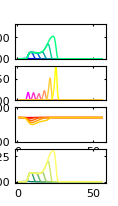

In [13]:
Km = 1e-3#umol/cm3
Km *= 31 #ug/cm3
Km *=1e-3 #ug/mm3
Km_snchepf = Km 

Km*1000
cm = 1/2.54  # centimeters in inches
%matplotlib widget
from dolfin import *
import numpy as np
import matplotlib as mpl
import os
import matplotlib.ticker as ticker
Length = 140*0.4
nx = int(350*15//10*0.4/0.8)
plt.close("all")
set_log_active(False)
cmap3 = mpl.cm.get_cmap("autumn")
cmap4 = mpl.cm.get_cmap("summer")

class Simulation:
    """
    A class for simulating a finite element problem using the FEniCS framework.

    Attributes:
    -----------
    Length: float
        Length of the interval domain.
    nx: int
        Number of subdivisions in the mesh.
    nT: int
        Number of time steps.
    T: float
        Total simulation time.
    C0: float
        Initial concentration value.
    Fmax: float
        Maximum flux value.
    Pprice_ideal: float
        Ideal price value.
    width: float
        Width of the plot.
    height: float
        Height of the plot.
    """
    def __init__(self, Length=Length, nx=nx, nT=200, T=400, C0=10, Fmax=2, Pprice_ideal=20, width=3*cm, height=7*cm,speed = 0.230,adaptation_rate = 1e-4,drag = 0):
        self.Length = Length
        self.nx = nx
        self.dx = Length/nx
        self.nT = nT
        self.T = T
        self.dt = T/nT
        self.C0 = C0 #ug.mm-3
        self.Fmax = Fmax
        self.Pprice_ideal = Pprice_ideal
        self.width = width
        self.height = height
        self.speed = speed
        self.adaptation_rate = adaptation_rate
        self.speed_penalty = drag
        self._setup_simulation()
        self.r0 = 3e-3

    def _setup_simulation(self):
        # Set up the simulation: define mesh, function spaces, initial conditions, etc.
        """
        Sets up the initial conditions and parameters for the simulation.
        """
        # Create mesh and define function space
        self.mesh = IntervalMesh(self.nx, 1, self.Length)
        P1 = FiniteElement('P', interval, 1)
        element = MixedElement([P1, P1, P1])
        self.V = FunctionSpace(self.mesh, element)

        # Define initial conditions
        u0 = Expression(('0.9*exp(-1.2*pow(abs(x[0]-7),2))', 
                         f'{self.C0}', '0*exp(-0.01*pow(abs(x[0]),2))'), degree=1)
        rexp = Expression(('1/x[0]', '0', '0'), degree=1)
        self.r = interpolate(rexp, self.V)
        self.invr, _, _ = split(self.r)
        self.u_n = interpolate(u0, self.V)

        # Splitting functions for later use
        self.u = Function(self.V)
        self.n, self.C, self.rho = split(self.u)   #mm-3,ug.mm-3,mm2.mm-3
        self.n_n, self.C_n, self.rho_n = split(self.u_n)
        self.v_1, self.v_0, self.v_2 = TestFunctions(self.V)

        # Set parameters and constants
        self.dt = self.T / self.nT
        self.alphval = 0.039 #.h-1
        self.alphval0 = self.alphval
        self.betaval = 0.022 #mm.h-1 length coefficient
        # self.betaval = 0.022/(2.5e-3) #mm.h-1 SA coefficient
        
        self.beta = Constant(self.betaval) #mm**4.h-1
        self.D = 0.0008 #mm**2.h-1
        self.D0 = self.D #mm**2.h-1
        
        self.D2 = Constant(0.036) #mm**2.h-1
        self.n_mid = 0.5*(self.n_n + self.n)
        self.v_sval = self.speed #mm.h-1
        self.s_scal = self.speed #mm.h-1
        self.v_s = Constant((self.v_sval,)) #mm.h-1
        self.Vmax = self.Fmax #ug.mm**-2.h-1
        self.Kp = Km_snchepf #ug.mm-3
        # Boundary conditions
        u_L = (Constant(0.0), Constant(0.0), Constant(0.0))
        u_R = (Constant(0.0), Constant(self.C0), Constant(0.0))
        bc_L0 = DirichletBC(self.V.sub(0), Constant(0.0), 'near(x[0], 1.0)')
        bc_L2 = DirichletBC(self.V.sub(2), Constant(0.0), 'near(x[0], 1.0)')
        # bc_L = DirichletBC(self.V, u_L, 'near(x[0], 1.0)')
        bc_R = DirichletBC(self.V, u_R, f'near(x[0], {self.Length})')
        self.bcs = [bc_L0,bc_L2, bc_R]

    def _make_F(self, alphval,D,sval):
        # Define the variational problem F
        alpha = Constant(alphval)
        D = Constant(D)
        s_scal = Constant(sval)
        # C_L =  self.C/bp
        
        # dn/dt
        F = self.n*self.v_1*dx - self.n_n*self.v_1*dx 
        # D lapplacian(n)
        F += D*dot(grad(self.n), grad(self.v_1))*self.dt*dx
        # To account for cylindrical coordinates
        F += self.invr*D*dot(grad(self.n), Constant((1,)))*self.v_1*self.dt*dx
        
        #v.grad(n)
        F += self.dt*dot(grad(self.n_mid),self.v_s)*self.v_1*dx
        # To account for cylindrical coordinates
        F += self.invr*self.dt*self.n_mid*Constant(self.v_sval)*self.v_1*dx
        
        #alpha*n - beta * n * rho
        F += self.beta*self.v_1*self.rho*(self.n)*self.dt*dx
        F -= alpha*(self.n)*self.v_1*self.dt*dx
        #d rho/dt = vn
        F -= self.dt*s_scal*self.n*self.v_2*dx-(self.rho-self.rho_n)*self.v_2*dx


        # dC/dt
        F += self.C*self.v_0*dx - self.C_n*self.v_0*dx #ug.mm-3
        # Vmax * rho * C/(C+Kp)
        #Expression without any radius change
        # F += 2*np.pi*self.Vmax*(self.rho/bp)*self.r0*(self.C/(self.Kp+self.C))*self.v_0*self.dt*dx #ug
        #Expression with radius change
        F += (self.v_sval/0.25)**(self.speed_penalty)*2*np.pi*self.Vmax*(self.rho/bp)*self.r0*(self.C/(self.Kp+self.C))*self.v_0*self.dt*dx #ug
        # Diffusion 
        F += self.D2*dot(grad(self.C), grad(self.v_0))*self.dt*dx
        # To account for cylindrical coordinates
        F += self.invr*self.D2*dot(grad(self.C), Constant((1,)))*self.v_0*self.dt*dx
        return F
    
    def integrate(self, plot=False,remove_ylabels = False):
        """
        Integrate the problem over time and optionally plot the results.
        Returns arrays of C(x, t), rho(x, t), and n(x, t) over the simulation.

        Parameters:
        -----------
        plot: bool
            If True, plot the results using matplotlib.

        Returns:
        --------
        C_xt: list of arrays
            Concentration C as a function of position x and time t.
        rho_xt: list of arrays
            Density rho as a function of position x and time t.
        n_xt: list of arrays
            Quantity n as a function of position x and time t.
        """
        # Initialize arrays to store C(x, t), rho(x, t), and n(x, t)
        C_xt = []
        rho_xt = []
        n_xt = []
        P_prices = []
        alphavals = []
        # Initialize matplotlib plots if needed
        if plot:
            fig, axs = plt.subplots(4, 1, figsize=(self.width, self.height*0.75))
            cmap = mpl.cm.get_cmap("winter")
            cmap2 = mpl.cm.get_cmap("spring")

        # Time-stepping loop
        V2 = FunctionSpace(self.mesh, 'P', 1)
        X = np.linspace(1, self.Length, self.nx)
        i=0
        tot_CCosts= [] 
        tot_Pacqus = []
        for t in tqdm(np.linspace(0, self.T, self.nT), desc="Simulating"):
            F = self._make_F(self.alphval,self.D,self.s_scal)
            solve(F == 0, self.u, self.bcs)
            self.u_n.assign(self.u)
            _n, _C, _rho = self.u.split()

            # Interpolate and store the results
            n_field = interpolate(_n, V2)
            rho_field = interpolate(_rho, V2)
            C_field = interpolate(_C, V2)
            Ccost = np.pi*np.sum([n_field(x)*x*self.dx*self.v_sval for x in X]) #mm.h-1
            Ccost *= np.pi*(self.r0)**2 #mm**3.h-1
            Ccost *= 1e-3  #mL.mm-1.h-1=dm**3.h-1
            
            Ccost *= 0.5*0.21*1.1 #g.h-1
            Ccost *= 1e6 #ug.h-1
            Ccost *= 2 #respiration
            
            Ccost *= (self.v_sval/0.25)**(self.speed_penalty)
            Pacquisition = np.pi*np.sum([self.Vmax*(C_field(x)/(C_field(x)+self.Kp))*rho_field(x)*x*self.dx for x in X]) #ug.h-1.mm-2
            Pacquisition *= 2*self.r0*np.pi #ug.mm-1
            # Pacquisition += 5e-4*np.exp(-t/100)
            tot_CCosts.append(Ccost) 
            tot_Pacqus.append(Pacquisition)
            # Pprice = Ccost/Pacquisition
            integrated_CCost = np.sum(tot_CCosts[-10*self.T//self.nT:])
            integrated_Pacqu = np.sum(tot_Pacqus[-10*self.T//self.nT:])
            
            Pprice = integrated_CCost/integrated_Pacqu

            alphavals.append(self.alphval)
            if t>=0:
                # self.s_scal = self.Pprice_ideal/Pprice*self.speed
                self.alphval = max(0.001,self.alphval + self.dt*self.adaptation_rate*(t/50)**2*signed_sqrt((self.Pprice_ideal-Pprice)/self.Pprice_ideal,alpha = 1))
            # print(self.alphval)
            self.D = self.D0*self.alphval0/self.alphval
            # print(2*(np.sqrt(self.D*self.alphval)))
            n_xt.append([n_field(x) for x in X])
            rho_xt.append([rho_field(x) for x in X])
            C_xt.append([C_field(x) for x in X])
            P_prices.append(Pprice)
            # print(Pprice,self.alphval)
            if plot and i % (self.nT//5) == 0:
                axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
                axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
                axs[2].plot(X, np.array(C_xt[-1])*1000, color=cmap3(t / self.T))
                Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/(C_xt[-1][i]+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]

                axs[3].plot(X, Pacq, color=cmap4(t / self.T))
                # break
            i+=1
            

        # Finalize plot settings if plotting
        if plot:
            axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
            axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
            satrho = np.median([rho for rho in rho_xt[-1] if rho>1e-10])
            
            # axs[0].hlines(satrho,np.min(X),np.max(X), color="red")
            
            # axs[2].plot(X, np.array(C_xt[-1])*1000/bp, color=cmap3(t / self.T))
            Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/(C_xt[-1][i]+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]
            axs[3].plot(X, Pacq, color=cmap4(t / self.T))
            axs[0].set_ylabel(r'$\rho$'+ '\n $(mm^{-1})$')
            axs[0].set_xticklabels([])
            axs[0].set_ylim(0,8)
            
            axs[1].set_ylabel('$n$ \n $(mm^{-2})$')
            axs[1].set_xticklabels([])
            axs[1].set_ylim(0,4)
            
#             axs[2].set_ylabel('$[P]$ \n ($ng/ mm^{3}$)')
#             axs[2].set_xticklabels([])
            axs[2].set_ylim(0,2)
            
#             axs[3].set_ylabel('$\phi_P$ \n ($ng/mm^{3}/h$)')

            axs[1].set_xlabel('position \n ($mm$)')
#             axs[3].set_ylim(0,0.30)

            formatter = ticker.FormatStrFormatter('%.2f')  # Adjust format as needed

            for ax in axs:
                ax.yaxis.set_major_formatter(formatter)
            if remove_ylabels:
                for ax in axs:
                    ax.set_ylabel('')
                    ax.set_yticklabels([])

            plt.show()

        return C_xt, rho_xt, n_xt,P_prices,alphavals
        
# Example usage:
adaptation_rate = 8e-3
C0=0.0014 #ug/mm3
Pprice_ideal = 3
speed = 0.17 #mm/h
T = 100
nT= 200
sim = Simulation(speed = speed,C0=C0,T = T,nT=nT,Pprice_ideal = Pprice_ideal,Fmax = Vmax,adaptation_rate = adaptation_rate,drag = 1)
C_xt, rho_xt, n_xt,P_prices,alphavals = sim.integrate(plot=True)


In [15]:
bp

8.8

/tmp/ipykernel_10297/1498325962.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap3 = mpl.cm.get_cmap("autumn")
/tmp/ipykernel_10297/1498325962.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap4 = mpl.cm.get_cmap("summer")
/tmp/ipykernel_10297/1498325962.py:186: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("winter")
/tmp/ipykernel_10297/1498325962.py:187: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7

Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

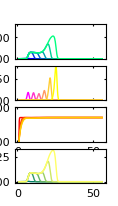

In [33]:
Km = 1e-3#umol/cm3
Km *= 31 #ug/cm3
Km *=1e-3 #ug/mm3
Km_snchepf = Km 

Km*1000
cm = 1/2.54  # centimeters in inches
%matplotlib widget
from dolfin import *
import numpy as np
import matplotlib as mpl
import os
import matplotlib.ticker as ticker
Length = 140*0.4
nx = int(350*15//10*0.4/0.8)
plt.close("all")
set_log_active(False)
cmap3 = mpl.cm.get_cmap("autumn")
cmap4 = mpl.cm.get_cmap("summer")

class Simulation:
    """
    A class for simulating a finite element problem using the FEniCS framework.

    Attributes:
    -----------
    Length: float
        Length of the interval domain.
    nx: int
        Number of subdivisions in the mesh.
    nT: int
        Number of time steps.
    T: float
        Total simulation time.
    C0: float
        Initial concentration value.
    Fmax: float
        Maximum flux value.
    Pprice_ideal: float
        Ideal price value.
    width: float
        Width of the plot.
    height: float
        Height of the plot.
    """
    def __init__(self, Length=Length, nx=nx, nT=200, T=400, C0=10, Fmax=2, Pprice_ideal=20, width=3*cm, height=7*cm,speed = 0.230,adaptation_rate = 1e-4,drag = 0):
        self.Length = Length
        self.nx = nx
        self.dx = Length/nx
        self.nT = nT
        self.T = T
        self.dt = T/nT
        self.C0 = C0 #ug.mm-3
        self.Fmax = Fmax
        self.Pprice_ideal = Pprice_ideal
        self.width = width
        self.height = height
        self.speed = speed
        self.adaptation_rate = adaptation_rate
        self.speed_penalty = drag
        self._setup_simulation()
        self.r0 = 3e-3

    def _setup_simulation(self):
        # Set up the simulation: define mesh, function spaces, initial conditions, etc.
        """
        Sets up the initial conditions and parameters for the simulation.
        """
        # Create mesh and define function space
        self.mesh = IntervalMesh(self.nx, 1, self.Length)
        P1 = FiniteElement('P', interval, 1)
        element = MixedElement([P1, P1, P1])
        self.V = FunctionSpace(self.mesh, element)

        # Define initial conditions
        u0 = Expression(('0.9*exp(-1.2*pow(abs(x[0]-7),2))', 
                         f'{self.C0}', '0*exp(-0.01*pow(abs(x[0]),2))'), degree=1)
        rexp = Expression(('1/x[0]', '0', '0'), degree=1)
        self.r = interpolate(rexp, self.V)
        self.invr, _, _ = split(self.r)
        self.u_n = interpolate(u0, self.V)

        # Splitting functions for later use
        self.u = Function(self.V)
        self.n, self.C, self.rho = split(self.u)   #mm-3,ug.mm-3,mm2.mm-3
        self.n_n, self.C_n, self.rho_n = split(self.u_n)
        self.v_1, self.v_0, self.v_2 = TestFunctions(self.V)

        # Set parameters and constants
        self.dt = self.T / self.nT
        self.alphval = 0.039 #.h-1
        self.alphval0 = self.alphval
        self.betaval = 0.022 #mm.h-1 length coefficient
        # self.betaval = 0.022/(2.5e-3) #mm.h-1 SA coefficient
        
        self.beta = Constant(self.betaval) #mm**4.h-1
        self.D = 0.0008 #mm**2.h-1
        self.D0 = self.D #mm**2.h-1
        
        self.D2 = Constant(0.036) #mm**2.h-1
        self.n_mid = 0.5*(self.n_n + self.n)
        self.v_sval = self.speed #mm.h-1
        self.s_scal = self.speed #mm.h-1
        self.v_s = Constant((self.v_sval,)) #mm.h-1
        self.Vmax = self.Fmax #ug.mm**-2.h-1
        self.Kp = Km_snchepf #ug.mm-3
        # Boundary conditions
        u_L = (Constant(0.0), Constant(0.0), Constant(0.0))
        u_R = (Constant(0.0), Constant(self.C0), Constant(0.0))
        bc_L0 = DirichletBC(self.V.sub(0), Constant(0.0), 'near(x[0], 1.0)')
        
        bc_L2 = DirichletBC(self.V.sub(2), Constant(0.0), 'near(x[0], 1.0)')
        # bc_L = DirichletBC(self.V, u_L, 'near(x[0], 1.0)')
        bc_R = DirichletBC(self.V, u_R, f'near(x[0], {self.Length})')
        self.bcs = [bc_L0,bc_L2, bc_R]

    def _make_F(self, alphval,D,sval):
        # Define the variational problem F
        alpha = Constant(alphval)
        D = Constant(D)
        s_scal = Constant(sval)
        # C_L =  self.C/bp
        
        # dn/dt
        F = self.n*self.v_1*dx - self.n_n*self.v_1*dx 
        # D lapplacian(n)
        F += D*dot(grad(self.n), grad(self.v_1))*self.dt*dx
        # To account for cylindrical coordinates
        F += self.invr*D*dot(grad(self.n), Constant((1,)))*self.v_1*self.dt*dx
        
        #v.grad(n)
        F += self.dt*dot(grad(self.n_mid),self.v_s)*self.v_1*dx
        # To account for cylindrical coordinates
        F += self.invr*self.dt*self.n_mid*Constant(self.v_sval)*self.v_1*dx
        
        #alpha*n - beta * n * rho
        F += self.beta*self.v_1*self.rho*(self.n)*self.dt*dx
        F -= alpha*(self.n)*self.v_1*self.dt*dx
        #d rho/dt = vn
        F -= self.dt*s_scal*self.n*self.v_2*dx-(self.rho-self.rho_n)*self.v_2*dx


        # dC/dt
        # Vmax * rho * C/(C+Kp)
        #Expression without any radius change
        # F += 2*np.pi*self.Vmax*(self.rho/bp)*self.r0*(self.C/(self.Kp+self.C))*self.v_0*self.dt*dx #ug
        #Expression with radius change
        F += (self.v_sval/0.25)**(self.speed_penalty)*2*np.pi*self.Vmax*(self.rho/bp)*self.r0*(self.C/(self.Kp+self.C))*self.v_0*self.dt*dx #ug
        # Diffusion 
        x_coord = SpatialCoordinate(self.mesh)[0]
        F += (self.C - self.C_n)*self.v_0*x_coord*dx
        F += self.dt * self.D2 * inner(grad(self.C), grad(self.v_0)) * x_coord * dx

        # To account for cylindrical coordinates
        return F
    
    def integrate(self, plot=False,remove_ylabels = False):
        """
        Integrate the problem over time and optionally plot the results.
        Returns arrays of C(x, t), rho(x, t), and n(x, t) over the simulation.

        Parameters:
        -----------
        plot: bool
            If True, plot the results using matplotlib.

        Returns:
        --------
        C_xt: list of arrays
            Concentration C as a function of position x and time t.
        rho_xt: list of arrays
            Density rho as a function of position x and time t.
        n_xt: list of arrays
            Quantity n as a function of position x and time t.
        """
        # Initialize arrays to store C(x, t), rho(x, t), and n(x, t)
        C_xt = []
        rho_xt = []
        n_xt = []
        P_prices = []
        alphavals = []
        # Initialize matplotlib plots if needed
        if plot:
            fig, axs = plt.subplots(4, 1, figsize=(self.width, self.height*0.75))
            cmap = mpl.cm.get_cmap("winter")
            cmap2 = mpl.cm.get_cmap("spring")

        # Time-stepping loop
        V2 = FunctionSpace(self.mesh, 'P', 1)
        X = np.linspace(1, self.Length, self.nx)
        i=0
        tot_CCosts= [] 
        tot_Pacqus = []
        for t in tqdm(np.linspace(0, self.T, self.nT), desc="Simulating"):
            F = self._make_F(self.alphval,self.D,self.s_scal)
            solve(F == 0, self.u, self.bcs)
            self.u_n.assign(self.u)
            _n, _C, _rho = self.u.split()

            # Interpolate and store the results
            n_field = interpolate(_n, V2)
            rho_field = interpolate(_rho, V2)
            C_field = interpolate(_C, V2)
            Ccost = np.pi*np.sum([n_field(x)*x*self.dx*self.v_sval for x in X]) #mm.h-1
            Ccost *= np.pi*(self.r0)**2 #mm**3.h-1
            Ccost *= 1e-3  #mL.mm-1.h-1=dm**3.h-1
            
            Ccost *= 0.5*0.21*1.1 #g.h-1
            Ccost *= 1e6 #ug.h-1
            Ccost *= 2 #respiration
            
            Ccost *= (self.v_sval/0.25)**(self.speed_penalty)
            Pacquisition = np.pi*np.sum([self.Vmax*(C_field(x)/(C_field(x)+self.Kp))*rho_field(x)*x*self.dx for x in X]) #ug.h-1.mm-2
            Pacquisition *= 2*self.r0*np.pi #ug.mm-1
            # Pacquisition += 5e-4*np.exp(-t/100)
            tot_CCosts.append(Ccost) 
            tot_Pacqus.append(Pacquisition)
            # Pprice = Ccost/Pacquisition
            integrated_CCost = np.sum(tot_CCosts[-10*self.T//self.nT:])
            integrated_Pacqu = np.sum(tot_Pacqus[-10*self.T//self.nT:])
            
            Pprice = integrated_CCost/integrated_Pacqu

            alphavals.append(self.alphval)
            if t>=0:
                # self.s_scal = self.Pprice_ideal/Pprice*self.speed
                self.alphval = max(0.001,self.alphval + self.dt*self.adaptation_rate*(t/50)**2*signed_sqrt((self.Pprice_ideal-Pprice)/self.Pprice_ideal,alpha = 1))
            # print(self.alphval)
            self.D = self.D0*self.alphval0/self.alphval
            # print(2*(np.sqrt(self.D*self.alphval)))
            n_xt.append([n_field(x) for x in X])
            rho_xt.append([rho_field(x) for x in X])
            C_xt.append([C_field(x) for x in X])
            P_prices.append(Pprice)
            # print(Pprice,self.alphval)
            if plot and i % (self.nT//5) == 0:
                axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
                axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
                axs[2].plot(X, np.array(C_xt[-1])*1000, color=cmap3(t / self.T))
                Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/(C_xt[-1][i]+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]

                axs[3].plot(X, Pacq, color=cmap4(t / self.T))
                # break
            i+=1
            

        # Finalize plot settings if plotting
        if plot:
            axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
            axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
            satrho = np.median([rho for rho in rho_xt[-1] if rho>1e-10])
            
            # axs[0].hlines(satrho,np.min(X),np.max(X), color="red")
            
            # axs[2].plot(X, np.array(C_xt[-1])*1000/bp, color=cmap3(t / self.T))
            Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/(C_xt[-1][i]+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]
            axs[3].plot(X, Pacq, color=cmap4(t / self.T))
            axs[0].set_ylabel(r'$\rho$'+ '\n $(mm^{-1})$')
            axs[0].set_xticklabels([])
            axs[0].set_ylim(0,8)
            
            axs[1].set_ylabel('$n$ \n $(mm^{-2})$')
            axs[1].set_xticklabels([])
            axs[1].set_ylim(0,4)
            
#             axs[2].set_ylabel('$[P]$ \n ($ng/ mm^{3}$)')
#             axs[2].set_xticklabels([])
            axs[2].set_ylim(0,2)
            
#             axs[3].set_ylabel('$\phi_P$ \n ($ng/mm^{3}/h$)')

            axs[1].set_xlabel('position \n ($mm$)')
#             axs[3].set_ylim(0,0.30)

            formatter = ticker.FormatStrFormatter('%.2f')  # Adjust format as needed

            for ax in axs:
                ax.yaxis.set_major_formatter(formatter)
            if remove_ylabels:
                for ax in axs:
                    ax.set_ylabel('')
                    ax.set_yticklabels([])

            plt.show()

        return C_xt, rho_xt, n_xt,P_prices,alphavals
        
# Example usage:
adaptation_rate = 8e-3
C0=0.0014 #ug/mm3
Pprice_ideal = 3
speed = 0.17 #mm/h
T = 100
nT= 200
sim = Simulation(speed = speed,C0=C0,T = T,nT=nT,Pprice_ideal = Pprice_ideal,Fmax = Vmax,adaptation_rate = adaptation_rate,drag = 1)
C_xt, rho_xt, n_xt,P_prices,alphavals = sim.integrate(plot=True)


/tmp/ipykernel_5783/1576380388.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap3 = mpl.cm.get_cmap("autumn")
/tmp/ipykernel_5783/1576380388.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap4 = mpl.cm.get_cmap("summer")
/tmp/ipykernel_5783/1576380388.py:179: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("winter")
/tmp/ipykernel_5783/1576380388.py:180: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and

Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

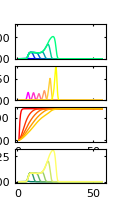

In [21]:
Km = 5.8e-4#umol/cm3
Km *= 31 #ug/cm3
Km *=1e-3 #ug/mm3
Km*1000
cm = 1/2.54  # centimeters in inches
%matplotlib widget
from dolfin import *
import numpy as np
import matplotlib as mpl
import os
import matplotlib.ticker as ticker
Length = 140*0.4
nx = int(350*15//10*0.4/0.8)
plt.close("all")
set_log_active(False)
cmap3 = mpl.cm.get_cmap("autumn")
cmap4 = mpl.cm.get_cmap("summer")

class Simulation:
    """
    A class for simulating a finite element problem using the FEniCS framework.

    Attributes:
    -----------
    Length: float
        Length of the interval domain.
    nx: int
        Number of subdivisions in the mesh.
    nT: int
        Number of time steps.
    T: float
        Total simulation time.
    C0: float
        Initial concentration value.
    Fmax: float
        Maximum flux value.
    Pprice_ideal: float
        Ideal price value.
    width: float
        Width of the plot.
    height: float
        Height of the plot.
    """
    def __init__(self, Length=Length, nx=nx, nT=200, T=400, C0=10, Fmax=2, Pprice_ideal=20, width=3*cm, height=7*cm,speed = 0.230,adaptation_rate = 1e-4,drag = 0):
        self.Length = Length
        self.nx = nx
        self.dx = Length/nx
        self.nT = nT
        self.T = T
        self.dt = T/nT
        self.C0 = C0 #ug.mm-3
        self.Fmax = Fmax
        self.Pprice_ideal = Pprice_ideal
        self.width = width
        self.height = height
        self.speed = speed
        self.adaptation_rate = adaptation_rate
        self.speed_penalty = drag
        self._setup_simulation()
        self.r0 = 3e-3

    def _setup_simulation(self):
        # Set up the simulation: define mesh, function spaces, initial conditions, etc.
        """
        Sets up the initial conditions and parameters for the simulation.
        """
        # Create mesh and define function space
        self.mesh = IntervalMesh(self.nx, 1, self.Length)
        P1 = FiniteElement('P', interval, 1)
        element = MixedElement([P1, P1, P1])
        self.V = FunctionSpace(self.mesh, element)

        # Define initial conditions
        u0 = Expression(('0.9*exp(-1.2*pow(abs(x[0]-7),2))', 
                         f'(1-exp(-3*(x[0]-1)))*{self.C0}', '0*exp(-0.01*pow(abs(x[0]),2))'), degree=1)
        rexp = Expression(('1/x[0]', '0', '0'), degree=1)
        self.r = interpolate(rexp, self.V)
        self.invr, _, _ = split(self.r)
        self.u_n = interpolate(u0, self.V)

        # Splitting functions for later use
        self.u = Function(self.V)
        self.n, self.C, self.rho = split(self.u)   #mm-3,ug.mm-3,mm2.mm-3
        self.n_n, self.C_n, self.rho_n = split(self.u_n)
        self.v_1, self.v_0, self.v_2 = TestFunctions(self.V)

        # Set parameters and constants
        self.dt = self.T / self.nT
        self.alphval = 0.039 #.h-1
        self.alphval0 = self.alphval
        self.betaval = 0.022 #mm.h-1 length coefficient
        # self.betaval = 0.022/(2.5e-3) #mm.h-1 SA coefficient
        
        self.beta = Constant(self.betaval) #mm**4.h-1
        self.D = 0.0008 #mm**2.h-1
        self.D0 = self.D #mm**2.h-1
        
        self.D2 = Constant(0.36) #mm**2.h-1
        self.n_mid = 0.5*(self.n_n + self.n)
        self.v_sval = self.speed #mm.h-1
        self.s_scal = self.speed #mm.h-1
        self.v_s = Constant((self.v_sval,)) #mm.h-1
        self.Vmax = self.Fmax #ug.mm**-2.h-1
        self.Kp = Km_snchepf #ug.mm-3
        # Boundary conditions
        u_L = (Constant(0.0), Constant(0.0), Constant(0.0))
        u_R = (Constant(0.0), Constant(self.C0), Constant(0.0))
        bc_L = DirichletBC(self.V, u_L, 'near(x[0], 1.0)')
        bc_R = DirichletBC(self.V, u_R, f'near(x[0], {self.Length})')
        self.bcs = [bc_L, bc_R]

    def _make_F(self, alphval,D,sval):
        # Define the variational problem F
        alpha = Constant(alphval)
        D = Constant(D)
        s_scal = Constant(sval)
        # C_L =  self.C/bp
        
        # dn/dt
        F = self.n*self.v_1*dx - self.n_n*self.v_1*dx 
        # D lapplacian(n)
        F += D*dot(grad(self.n), grad(self.v_1))*self.dt*dx
        # To account for cylindrical coordinates
        F += self.invr*D*dot(grad(self.n), Constant((1,)))*self.v_1*self.dt*dx
        
        #v.grad(n)
        F += self.dt*dot(grad(self.n_mid),self.v_s)*self.v_1*dx
        # To account for cylindrical coordinates
        F += self.invr*self.dt*self.n_mid*Constant(self.v_sval)*self.v_1*dx
        
        #alpha*n - beta * n * rho
        F += self.beta*self.v_1*self.rho*(self.n)*self.dt*dx
        F -= alpha*(self.n)*self.v_1*self.dt*dx
        #d rho/dt = vn
        F -= self.dt*s_scal*self.n*self.v_2*dx-(self.rho-self.rho_n)*self.v_2*dx


        # dC/dt
        F += self.C*self.v_0*dx - self.C_n*self.v_0*dx #ug.mm-3
        # Vmax * rho * C/(C+Kp)
        #Expression without any radius change
        # F += 2*np.pi*self.Vmax*(self.rho/bp)*self.r0*(self.C/(self.Kp+self.C))*self.v_0*self.dt*dx #ug
        #Expression with radius change
        F += (self.v_sval/0.25)**(self.speed_penalty)*2*np.pi*self.Vmax*(self.rho/bp)*self.r0*(self.C/(self.Kp+self.C))*self.v_0*self.dt*dx #ug
        # Diffusion 
        F += self.D2*dot(grad(self.C), grad(self.v_0))*self.dt*dx
        # To account for cylindrical coordinates
        F += self.invr*self.D2*dot(grad(self.C), Constant((1,)))*self.v_0*self.dt*dx
        return F
    
    def integrate(self, plot=False,remove_ylabels = False):
        """
        Integrate the problem over time and optionally plot the results.
        Returns arrays of C(x, t), rho(x, t), and n(x, t) over the simulation.

        Parameters:
        -----------
        plot: bool
            If True, plot the results using matplotlib.

        Returns:
        --------
        C_xt: list of arrays
            Concentration C as a function of position x and time t.
        rho_xt: list of arrays
            Density rho as a function of position x and time t.
        n_xt: list of arrays
            Quantity n as a function of position x and time t.
        """
        # Initialize arrays to store C(x, t), rho(x, t), and n(x, t)
        C_xt = []
        rho_xt = []
        n_xt = []
        P_prices = []
        alphavals = []
        # Initialize matplotlib plots if needed
        if plot:
            fig, axs = plt.subplots(4, 1, figsize=(self.width, self.height*0.75))
            cmap = mpl.cm.get_cmap("winter")
            cmap2 = mpl.cm.get_cmap("spring")

        # Time-stepping loop
        V2 = FunctionSpace(self.mesh, 'P', 1)
        X = np.linspace(1, self.Length, self.nx)
        i=0
        tot_CCosts= [] 
        tot_Pacqus = []
        for t in tqdm(np.linspace(0, self.T, self.nT), desc="Simulating"):
            F = self._make_F(self.alphval,self.D,self.s_scal)
            solve(F == 0, self.u, self.bcs)
            self.u_n.assign(self.u)
            _n, _C, _rho = self.u.split()

            # Interpolate and store the results
            n_field = interpolate(_n, V2)
            rho_field = interpolate(_rho, V2)
            C_field = interpolate(_C, V2)
            Ccost = np.pi*np.sum([n_field(x)*x*self.dx*self.v_sval for x in X]) #mm.h-1
            Ccost *= np.pi*(self.r0)**2 #mm**3.h-1
            Ccost *= 1e-3  #mL.mm-1.h-1=dm**3.h-1
            
            Ccost *= 0.5*0.21*1.1 #g.h-1
            Ccost *= 1e6 #ug.h-1
            Ccost *= 2 #respiration
            
            Ccost *= (self.v_sval/0.25)**(self.speed_penalty)
            Pacquisition = np.pi*np.sum([self.Vmax*(C_field(x)/(C_field(x)+self.Kp))*rho_field(x)*x*self.dx for x in X]) #ug.h-1.mm-2
            Pacquisition *= 2*self.r0*np.pi #ug.mm-1
            # Pacquisition += 5e-4*np.exp(-t/100)
            tot_CCosts.append(Ccost) 
            tot_Pacqus.append(Pacquisition)
            # Pprice = Ccost/Pacquisition
            integrated_CCost = np.sum(tot_CCosts[-10*self.T//self.nT:])
            integrated_Pacqu = np.sum(tot_Pacqus[-10*self.T//self.nT:])
            
            Pprice = integrated_CCost/integrated_Pacqu

            alphavals.append(self.alphval)
            if t>=0:
                # self.s_scal = self.Pprice_ideal/Pprice*self.speed
                self.alphval = max(0.001,self.alphval + self.dt*self.adaptation_rate*(t/50)**2*signed_sqrt((self.Pprice_ideal-Pprice)/self.Pprice_ideal,alpha = 1))
            # print(self.alphval)
            self.D = self.D0*self.alphval0/self.alphval
            # print(2*(np.sqrt(self.D*self.alphval)))
            n_xt.append([n_field(x) for x in X])
            rho_xt.append([rho_field(x) for x in X])
            C_xt.append([C_field(x) for x in X])
            P_prices.append(Pprice)
            # print(Pprice,self.alphval)
            if plot and i % (self.nT//5) == 0:
                axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
                axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
                axs[2].plot(X, np.array(C_xt[-1])*1000, color=cmap3(t / self.T))
                Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/(C_xt[-1][i]+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]

                axs[3].plot(X, Pacq, color=cmap4(t / self.T))
                # break
            i+=1
            

        # Finalize plot settings if plotting
        if plot:
            axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
            axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
            satrho = np.median([rho for rho in rho_xt[-1] if rho>1e-10])
            
            # axs[0].hlines(satrho,np.min(X),np.max(X), color="red")
            
            # axs[2].plot(X, np.array(C_xt[-1])*1000/bp, color=cmap3(t / self.T))
            Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/(C_xt[-1][i]+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]
            axs[3].plot(X, Pacq, color=cmap4(t / self.T))
            axs[0].set_ylabel(r'$\rho$'+ '\n $(mm^{-1})$')
            axs[0].set_xticklabels([])
            axs[0].set_ylim(0,8)
            
            axs[1].set_ylabel('$n$ \n $(mm^{-2})$')
            axs[1].set_xticklabels([])
            axs[1].set_ylim(0,4)
            
#             axs[2].set_ylabel('$[P]$ \n ($ng/ mm^{3}$)')
#             axs[2].set_xticklabels([])
#             axs[2].set_ylim(0,2)
            
#             axs[3].set_ylabel('$\phi_P$ \n ($ng/mm^{3}/h$)')

            axs[1].set_xlabel('position \n ($mm$)')
#             axs[3].set_ylim(0,0.30)

            formatter = ticker.FormatStrFormatter('%.2f')  # Adjust format as needed

            for ax in axs:
                ax.yaxis.set_major_formatter(formatter)
            if remove_ylabels:
                for ax in axs:
                    ax.set_ylabel('')
                    ax.set_yticklabels([])

            plt.show()

        return C_xt, rho_xt, n_xt,P_prices,alphavals
        

# Example usage:
adaptation_rate = 8e-3
C0=0.0014 #ug/mm2
Pprice_ideal = 3
speed = 0.17 #mm/h
T = 100
nT= 200
sim = Simulation(speed = speed,C0=C0,T = T,nT=nT,Pprice_ideal = Pprice_ideal,Fmax = Vmax,adaptation_rate = adaptation_rate,drag = 1)
C_xt, rho_xt, n_xt,P_prices,alphavals = sim.integrate(plot=True)


In [ ]:
Pprice_ideal = 3
speed = 0.26
sim = Simulation(speed = speed,C0=C0,T = T,nT=nT,Pprice_ideal = Pprice_ideal,Fmax = Vmax,adaptation_rate = adaptation_rate,drag = 1)
C_xt, rho_xt, n_xt,P_prices,alphavals = sim.integrate(plot=True,remove_ylabels = True)